In [1]:
from visualize import report_const_experiment, report_experiment, report_experiment_summary, plot_sys_behaviour, \
plot_agent_behaviour
%matplotlib inline

# Stochastic case, constant `p_reff` - power reference

In [2]:
case_folder = "ps_stoch/"

## Baseline exeperiment - constant action applied instead of controller-chosen action

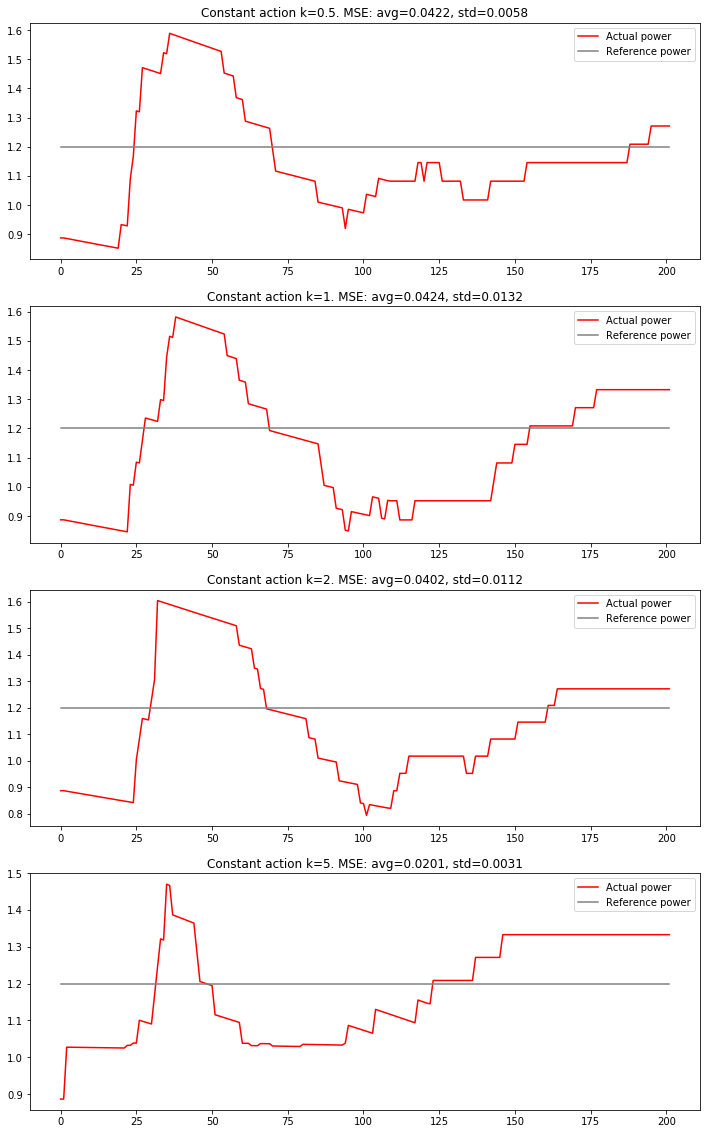

In [3]:
name = case_folder + "constant_action_variation_19-10-2019_21-06"
report_const_experiment(name)

## Q-learning
## Q-learning hyperparameters chosen on the p_reff=const case

In [4]:
experiments_folder = case_folder + "best_parameters_combination_19-09-2019_13-33/"
experiment_name = "Stoch.PS, Q-learning:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.30100934 0.28505123 0.29600173 0.3013342  0.35525025] s
Mean time per simulation step: 0.308 s, std: 0.0245 s
Total execution time: 30772.935 s for 100000 steps -> 0.308 s per step

Average MSE in exploitation mode 0.0132 +- 0.0039
Average exploitation performance of each agent: 
[0.013215 0.013781 0.013896 0.013091 0.012266]


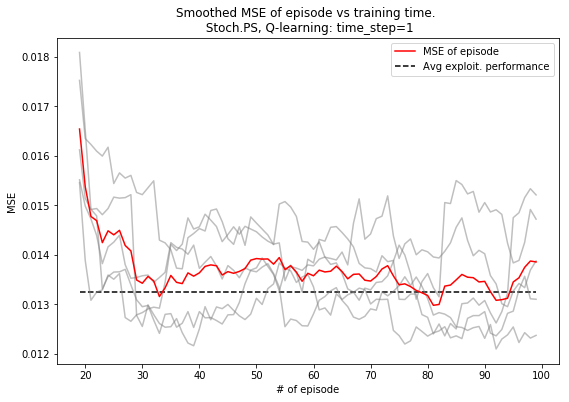

In [5]:
case = "time_step=1"
df_avgsm_mses_1, perf_1, sig_1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

Last episode performance: 0.02
Time per simulation step in each experiment: [0.33841488 0.31405417 0.3000132  0.29917935 0.29824352] s
Mean time per simulation step: 0.310 s, std: 0.0154 s
Total execution time: 6199.620 s for 20000 steps -> 0.310 s per step

Average MSE in exploitation mode 0.0165 +- 0.0038
Average exploitation performance of each agent: 
[0.015009 0.015475 0.01569  0.015653 0.02047 ]


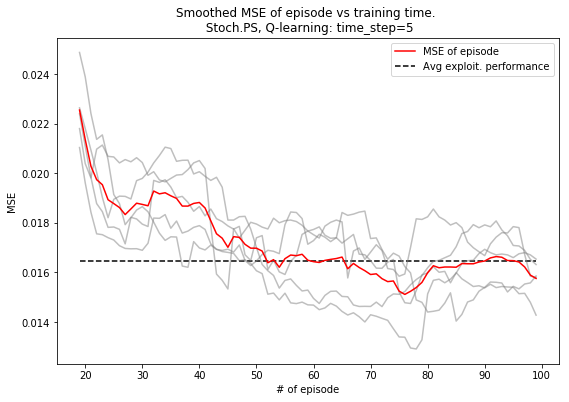

In [6]:
case = "time_step=5"
df_avgsm_mses_2, perf_2, sig_2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

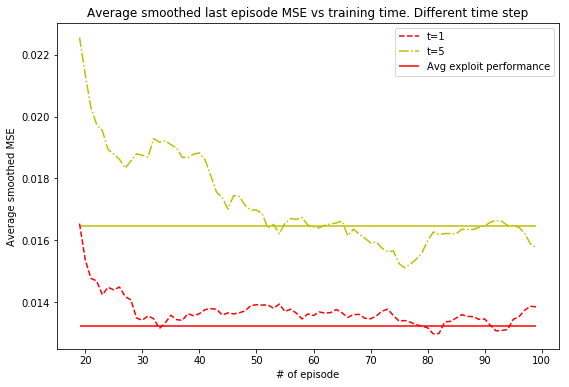

In [7]:
labels = ["t=1", "t=5"]
mses = [df_avgsm_mses_1, df_avgsm_mses_2]
perfs = [perf_1, perf_2]
sigs = [sig_1, sig_2]
report_experiment_summary("Different time step", mses, perfs, sigs, labels, 0)

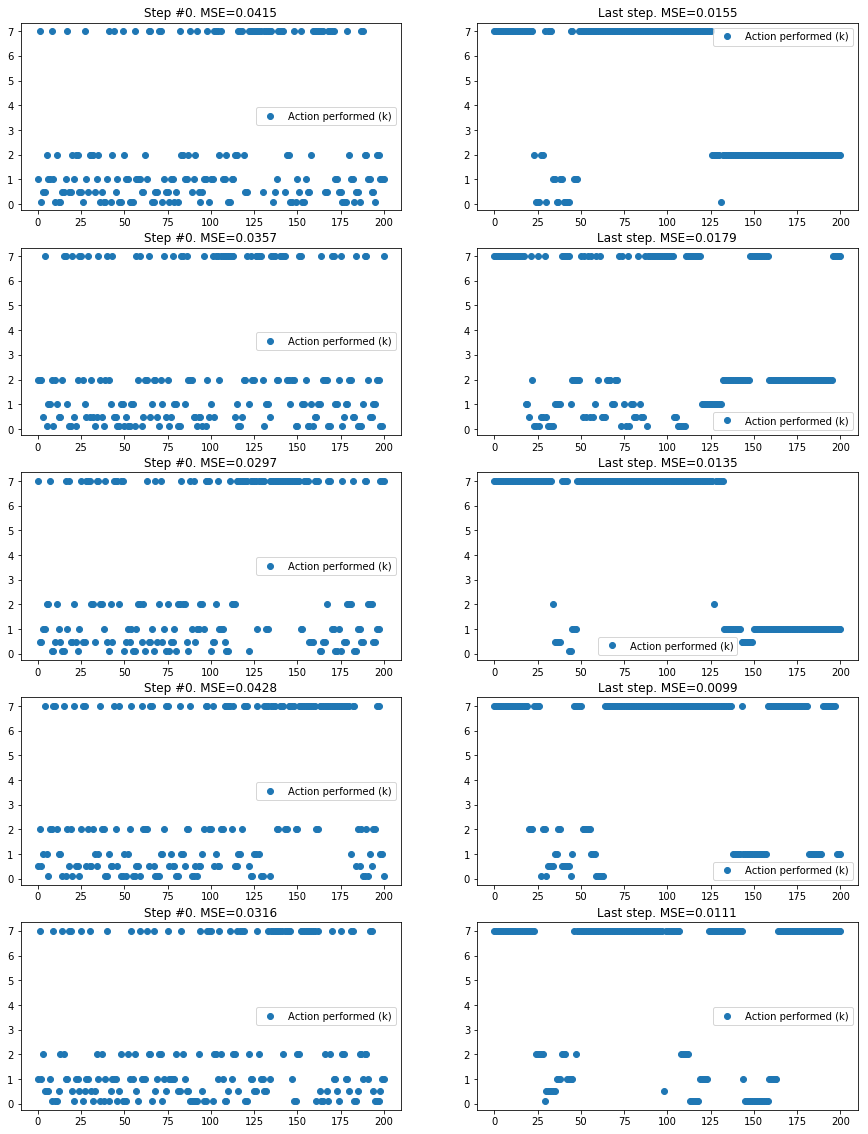

In [8]:
plot_agent_behaviour(experiments_folder + "/time_step=1")

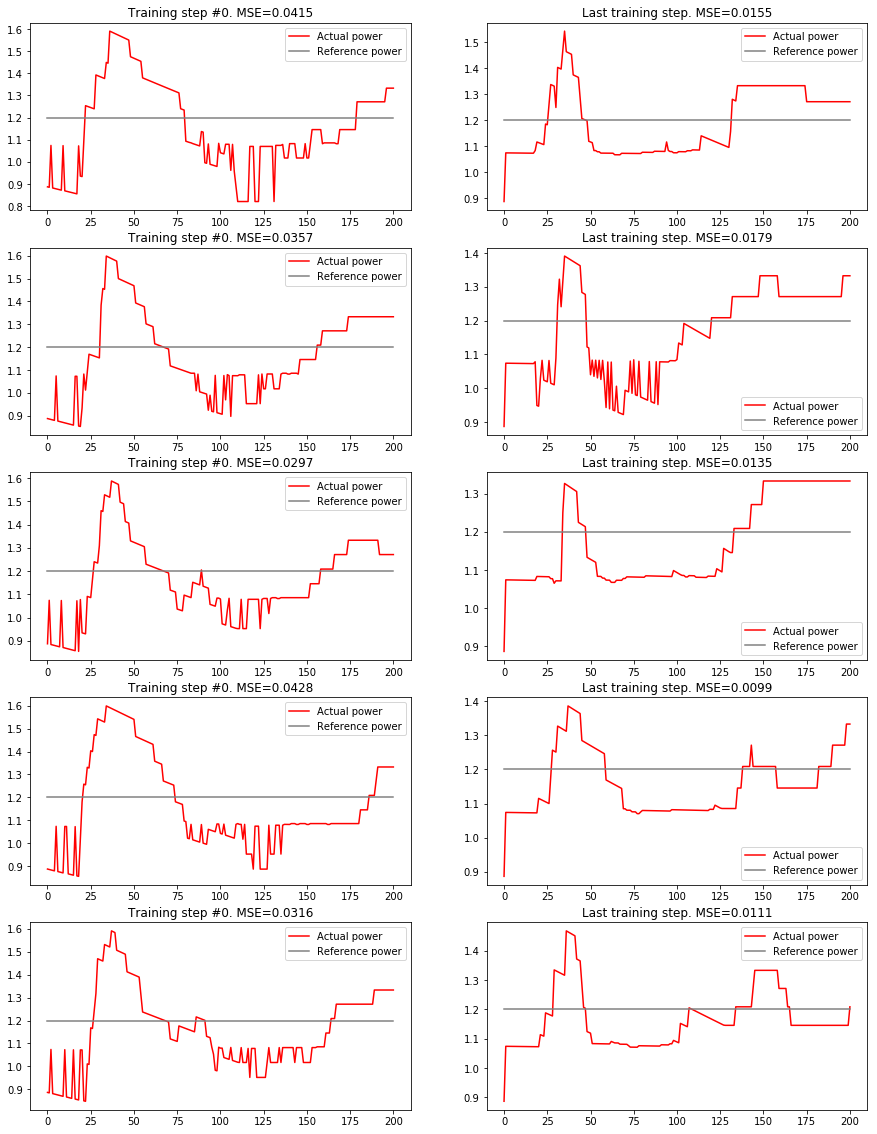

In [9]:
plot_sys_behaviour(experiments_folder + "/time_step=1")